<a href="https://colab.research.google.com/github/inuwamobarak/Image-captioning-ViT/blob/main/Image_Captioning_using_Transformer_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

Image captioning involves translating an image into a textual description. We use Vision Transformers (ViT) and PyTorch backend. The article and code demonstrates using trained models without retraining from scratch to generate image captions.

# Importing Required Libraries

In [1]:
# Web links Handler
import requests

# Backend
import torch

# Image Processing
from PIL import Image

# Transformer and Pretrained Model
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, GPT2TokenizerFast

# Managing loading processsing
from tqdm import tqdm

# Assign available GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

c:\Users\a\.conda\envs\vlt\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Using a Trained Model

In [2]:
# Loading a fine-tuned image captioning Transformer Model
local_model_path = "./models/vit-gpt2-image-captioning"

# 加载本地模型
model = VisionEncoderDecoderModel.from_pretrained(local_model_path).to(device)

# 加载本地tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained(local_model_path)

# 加载本地image processor
image_processor = ViTImageProcessor.from_pretrained(local_model_path)

VisionEncoderDecoderModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
c:\Users\a\.conda\envs\vlt\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It w

# Preparing Image Data

Preparing image for capturing

In [3]:
# Accesssing images from the web
import urllib.parse as parse
import os
# Verify url
def check_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# Load an image
def load_image(image_path):
    if check_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

# Performing Inference on Image

In [4]:
# Image inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)

    # Preprocessing the Image
    img = image_processor(image, return_tensors="pt").to(device)

    # Generating captions
    output = model.generate(**img)

    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]

    return caption

# Loading and Capturing Images

In [5]:
#  Image media display
from IPython.display import display

*Example 1.*

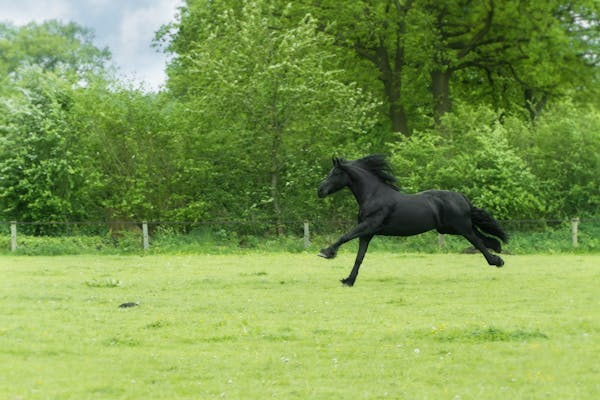

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


图片描述: a black horse running through a grassy field 


In [6]:
# 修改后的图片加载函数
def load_local_image(image_path):
    try:
        return Image.open(image_path).convert("RGB")
    except Exception as e:
        print(f"图片加载失败: {str(e)}")
        return None

# 修改后的描述生成函数
def get_local_caption(model, image_processor, tokenizer, image_path):
    # 加载本地图片
    image = load_local_image(image_path)
    if not image:
        return "无法加载图片"
    
    # 预处理与预测
    inputs = image_processor(images=image, return_tensors="pt").to(device)
    outputs = model.generate(**inputs, max_new_tokens=20)
    caption = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
    return caption

# 本地图片路径（使用原始字符串处理Windows路径）
local_image_path = r"./image/img1.jpg"  # 注意补充文件扩展名

# 显示图片
display(load_local_image(local_image_path))

# 生成描述
print("图片描述:", get_local_caption(model, image_processor, tokenizer, local_image_path))

*Example 2.*

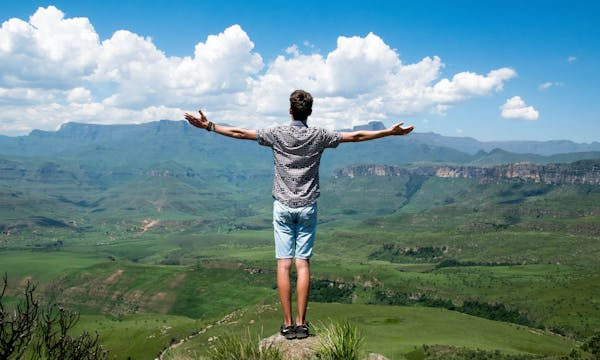

图片描述: a man standing on top of a hill with a mountain 


In [7]:
# 本地图片路径（使用原始字符串处理Windows路径）
local_image_path = r"./image/img2.jpg"  # 注意补充文件扩展名

# 显示图片
display(load_local_image(local_image_path))

# 生成描述
print("图片描述:", get_local_caption(model, image_processor, tokenizer, local_image_path))

*Example 3.*

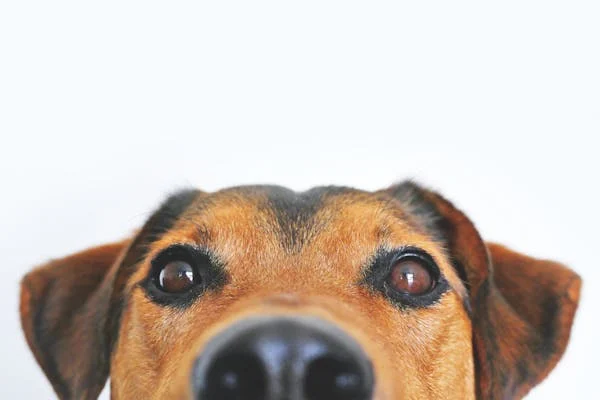

图片描述: a dog with a long nose 


In [8]:
# 本地图片路径（使用原始字符串处理Windows路径）
local_image_path = r"./image/img3.jpg"  # 注意补充文件扩展名

# 显示图片
display(load_local_image(local_image_path))

# 生成描述
print("图片描述:", get_local_caption(model, image_processor, tokenizer, local_image_path))